# Machine Learning - Assignment 3

### Oscar Fabián Ñáñez Núñez - Juan Camilo Calero Espinosa
### ofnanezn - jccaleroe

In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import scale
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as AL
from sklearn.kernel_approximation import RBFSampler
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
import plotly
plotly.tools.set_credentials_file(username='jccaleroe', api_key='31jq72ObDKXbhBSSm4bF')
import plotly.plotly as py
import plotly.graph_objs as go

## 1.

## a)
To obtain the feature space of each kernel, the formula given in the assigment was implemented:
$$ \overline{d} = \frac{1}{n}\sum_{i=1}^{n}\left\Vert \phi(x_{i})-\phi_{S}\left(\mathrm{x}\right)\right\Vert _{\phi(\mathrm{X})}$$
$$\quad \quad \quad = \frac{1}{n}\sum_{i=1}^{n}\left\Vert \phi(x_{i})-\frac{1}{n}\sum_{j=1}^{n}\phi(x_{j})\right\Vert _{\phi\left(\mathrm{X}\right)} $$

In [5]:
def massFuntion(phi, x):
    return np.sum(np.array( [ phi(X) for X in x ] ), axis=0 ) / x.shape[0]

In [6]:
def averageDistance(phi, x):
    s = massFuntion(phi, x)
    return np.sum([AL.norm(phi(X) - s) for X in x ]) / x.shape[0]    

## b)

In [7]:
#<x,y>
def phi1(x):
    return np.array([x[0], x[1]])

In [8]:
#(<x,y>)^2
def phi2(x):
    return np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2])

In [9]:
#(<x,y>+1)^5
#x1^10 + 5 x1^8 x2^2 + 5 x1^8 + 10 x1^6 x2^4 + 20 x1^6 x2^2 + 10 x1^6 + 10 x1^4 x2^6 + 30 x1^4 x2^4 + 30 x1^4 x2^2 + 10 x1^4 + 5 x1^2 x2^8 + 20 x1^2 x2^6 + 30 x1^2 x2^4 + 20 x1^2 x2^2 + 5 x1^2 + x2^10 + 5 x2^8 + 10 x2^6 + 10 x2^4 + 5 x2^2 + 1
def phi3(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([x1**5, np.sqrt(5)*(x1**4)*(x2), np.sqrt(5)*(x1**4), np.sqrt(10)*(x1**3)*(x2**2), 
                     np.sqrt(20)*(x1**3)*x2, np.sqrt(10)*(x1**3), np.sqrt(10)*(x1**2)*(x2**3), 
                     np.sqrt(30)*(x1**2)*(x2**2), np.sqrt(30)*(x1**2)*x2 , np.sqrt(10)*(x1**2), 
                     np.sqrt(5)*x1*(x2**4), np.sqrt(20)*x1*(x2**3), np.sqrt(30)*x1*(x2**2), np.sqrt(20)*x1*x2, 
                     np.sqrt(5)*x1, x2**5, np.sqrt(5)*(x2**4), np.sqrt(10)*(x2**3), np.sqrt(10)*(x2**2), np.sqrt(5)*x2 , 1])

In [10]:
x = np.array([[0,1], [-1,3], [2,4], [3,-1], [-1,-2]])

print("Average distance to center of mass with kernels:\n")
print("Lineal kernel =>", averageDistance(phi1, x))
print("Squared kernel =>", averageDistance(phi2, x))
print("Polynomial kernel =>", averageDistance(phi3, x))

##Gaussian
rbf_feature = RBFSampler(gamma=1, random_state=1)
p = rbf_feature.fit_transform(x)
s = np.sum(p, axis=0) / x.shape[0]
print("Gaussian kernel =>", np.sum([AL.norm(X - s) for X in p]) / x.shape[0])

Average distance to center of mass with kernels:

('Lineal kernel =>', 2.5218896377192297)
('Squared kernel =>', 7.93374823939363)
('Polynomial kernel =>', 699.7672616263939)
('Gaussian kernel =>', 0.8770336212133835)


## 2.

## a)

In [11]:
mnist = fetch_mldata('MNIST original')
mnist_features = mnist["data"]
mnist_label = mnist["target"]
print(mnist_features.shape)
print(mnist_label.shape)

(70000, 784)
(70000,)


Taking some sample images:

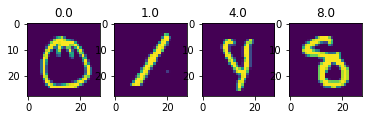

In [21]:
plt.subplot(1, 4, 1)
plt.imshow(mnist_features[1000].reshape(28,28))
plt.title(str(mnist_label[1000]))
plt.subplot(1, 4, 2)
plt.imshow(mnist_features[10000].reshape(28,28))
plt.title(str(mnist_label[10000]))
plt.subplot(1, 4, 3)
plt.imshow(mnist_features[25000].reshape(28,28))
plt.title(str(mnist_label[25000]))
plt.subplot(1, 4, 4)
plt.imshow(mnist_features[50000].reshape(28,28))
plt.title(str(mnist_label[50000]))

## b)

In [22]:
mnist_normalized = scale(mnist_features)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [23]:
print("MNIST Normalized Mean:")
print(mnist_normalized.mean(axis=0))
print("MNIST Normalized Std_Deviation:")
print(mnist_normalized.std(axis=0))

MNIST Normalized Mean:
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.90297954e-16  1.37035621e-15  3.46195430e-15  1.85119228e-15
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.66164811e-15 -3.96895770e-15 -1.04125612e-15 -3.21838528e-15
  2.96320657e-16  1.94626101e-15  6.56149450e-15  7.37403432e-15
 -8.95523655e-15 -1.17649416e-14 -7.39276874e-15  9.30961023e-15
  3.57000094e-15  1.63714884e-14 -2.70308924e-15 -5.43929257e-15
  1.83800445e-15  2.36091503e-15  1.64787886e-15  2.94463957e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.65354324e-15  2.82215677e-15
 -

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

As we can see, the mean are values close to zero, and in the case of Standar Deviation, almost all values are 1, except for columns where all values are exactly zero. <br><br>
Let's plot some samples with the values normalized:

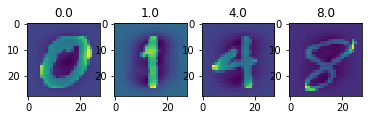

In [25]:
plt.subplot(1, 4, 1)
plt.imshow(mnist_normalized[1100].reshape(28,28))
plt.title(str(mnist_label[1100]))
plt.subplot(1, 4, 2)
plt.imshow(mnist_normalized[11000].reshape(28,28))
plt.title(str(mnist_label[11000]))
plt.subplot(1, 4, 3)
plt.imshow(mnist_normalized[26000].reshape(28,28))
plt.title(str(mnist_label[26000]))
plt.subplot(1, 4, 4)
plt.imshow(mnist_normalized[51000].reshape(28,28))
plt.title(str(mnist_label[51000]))

## c)

We will use the classes 6 and 9.

In [82]:
C_values = [2**i for i in range(-15,11)]

ranges = [(0,5923),(5923,12665),(12665,18623),(18623,24754),(24754,30596),(30596,36017),(36017,41935),(41935,48200),(48200,54051),(54051,60000),
          (60000,60980),(60980,62115),(62115,63147),(63147,64157),(64157,65139),(65139,66031),(66031,66989),(66989,68017),(68017,68991),(68991,70000)]

r_min1_train, r_max1_train = ranges[6][0], ranges[6][1]
r_min2_train, r_max2_train = ranges[9][0], ranges[9][1]
r_min1_test, r_max1_test = ranges[16][0], ranges[16][1]
r_min2_test, r_max2_test = ranges[19][0], ranges[19][1]


features_class6_train = mnist_normalized[r_min1_train:r_max1_train,:]
features_class9_train = mnist_normalized[r_min2_train:r_max2_train,:]
labels_class6_train = mnist_label[r_min1_train:r_max1_train]
labels_class9_train = mnist_label[r_min2_train:r_max2_train]
features_class6_test = mnist_normalized[r_min1_test:r_max1_test,:]
features_class9_test = mnist_normalized[r_min2_test:r_max2_test,:]
labels_class6_test = mnist_label[r_min1_test:r_max1_test]
labels_class9_test = mnist_label[r_min2_test:r_max2_test]

print("C Values:")
print(C_values)
print("Shapes for training vectors:")
print(features_class6_train.shape, features_class9_train.shape, labels_class6_train.shape, labels_class9_train.shape)
print("Shapes for training vectors:")
print(features_class6_test.shape, features_class9_test.shape, labels_class6_test.shape, labels_class9_test.shape)

C Values:
[3.0517578125e-05, 6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
Shapes for training vectors:
((5918, 784), (5949, 784), (5918,), (5949,))
Shapes for training vectors:
((958, 784), (1009, 784), (958,), (1009,))


In [83]:
features_train = np.vstack((features_class6_train, features_class9_train))
features_test = np.vstack((features_class6_test, features_class9_test))
labels_train = np.append(labels_class6_train, labels_class9_train)
labels_test = np.append(labels_class6_test, labels_class9_test)

print(features_train.shape, labels_train.shape)
print(features_test.shape, labels_test.shape)

((11867, 784), (11867,))
((1967, 784), (1967,))


Plotting some samples:

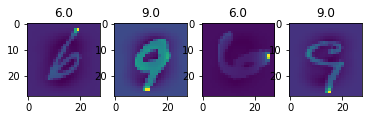

In [84]:
plt.subplot(1, 4, 1)
plt.imshow(features_train[100].reshape(28,28))
plt.title(str(labels_train[100]))
plt.subplot(1, 4, 2)
plt.imshow(features_train[8000].reshape(28,28))
plt.title(str(labels_train[8000]))
plt.subplot(1, 4, 3)
plt.imshow(features_test[100].reshape(28,28))
plt.title(str(labels_test[100]))
plt.subplot(1, 4, 4)
plt.imshow(features_test[1500].reshape(28,28))
plt.title(str(labels_test[1500]))

In [85]:
historic_error_train = []
historic_error_test = []

for C in C_values:
    model = svm.LinearSVC(C=C,loss='hinge')
    model.fit(features_train, labels_train)
    predicted_train = model.predict(features_train)
    predicted_test = model.predict(features_test)
    error_train = sklearn.metrics.mean_squared_error(labels_train, predicted_train)
    error_test = sklearn.metrics.mean_squared_error(labels_test, predicted_test)
    historic_error_train.append(error_train)
    historic_error_test.append(error_test)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  


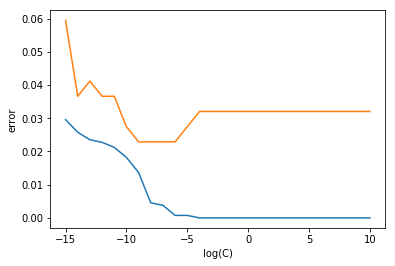

In [99]:
plt.plot([i for i in range(-15,11)],historic_error_train)
plt.hold(True)
plt.plot([i for i in range(-15,11)],historic_error_test)
plt.xlabel("log(C)")
plt.ylabel("error")

Since the value $-6$ has the min error between training and test set, we will choose $C = 2^{-6}$. 

## d)

In [103]:
model = svm.LinearSVC(C=C_values[9],loss='hinge')
model.fit(features_train, labels_train)

In [104]:
weights = model.coef_
print(weights.shape)
print(weights)

(1, 784)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -7.65436086e-04 -9.97026835e-04 -7.07299966e-04 -7.07299966e-04
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -7.07299966e-04 -1.07893286e-03 -1.60269817e-03 -2.12730543e-03
  -2.74125480e-03 -3.59274636e-03 -4.57812284e-03 -5.64458016e-03
  -5.98059898e-03 -6.03193260e-03 -6.18287818e-03 -5.77646348e-03
  -5.66419783e-03 -5.13536210e-03 -4.29068215e-03 -3.46827231e-03
  -3.01549509e-03 -1.90511573e-03 -1.58646264e-03 -1.06146449e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -7.07299966e-04 -9.34748026e-04
 

## e)

### i)

In [ ]:
matrix_weights = weights.reshape((28,28))

### ii)

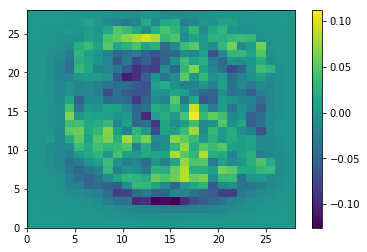

In [116]:
plt.pcolor(matrix_weights)
plt.colorbar()

### iii)

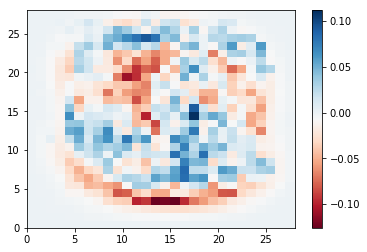

In [117]:
plt.pcolor(matrix_weights, cmap='RdBu')
plt.colorbar()

### iv)

As we can see in the above picture, the positive and negative values are around the center, so we can think as these values as the most significant values when we try to make predictions. Furthermore, it seems the positive weights are approximately around the $6$ contour and the positive weights are around the $9$ contour, which means that it tries to predict six as positive examples and nine as negative examples. 

## f)

### Test for 0 and 1 (C = $2^{-12}$)

In [159]:
r_min1_train, r_max1_train = ranges[0][0], ranges[0][1]
r_min2_train, r_max2_train = ranges[1][0], ranges[1][1]
r_min1_test, r_max1_test = ranges[10][0], ranges[10][1]
r_min2_test, r_max2_test = ranges[11][0], ranges[11][1]

features_class1_train = mnist_normalized[r_min1_train:r_max1_train,:]
features_class2_train = mnist_normalized[r_min2_train:r_max2_train,:]
labels_class1_train = mnist_label[r_min1_train:r_max1_train]
labels_class2_train = mnist_label[r_min2_train:r_max2_train]
features_class1_test = mnist_normalized[r_min1_test:r_max1_test,:]
features_class2_test = mnist_normalized[r_min2_test:r_max2_test,:]
labels_class1_test = mnist_label[r_min1_test:r_max1_test]
labels_class2_test = mnist_label[r_min2_test:r_max2_test]

features_train = np.vstack((features_class1_train, features_class2_train))
features_test = np.vstack((features_class1_test, features_class2_test))
labels_train = np.append(labels_class1_train, labels_class2_train)
labels_test = np.append(labels_class1_test, labels_class2_test)

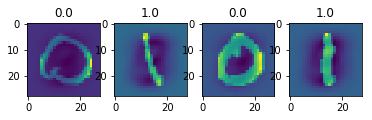

In [160]:
plt.subplot(1, 4, 1)
plt.imshow(features_train[100].reshape(28,28))
plt.title(str(labels_train[100]))
plt.subplot(1, 4, 2)
plt.imshow(features_train[8000].reshape(28,28))
plt.title(str(labels_train[8000]))
plt.subplot(1, 4, 3)
plt.imshow(features_test[100].reshape(28,28))
plt.title(str(labels_test[100]))
plt.subplot(1, 4, 4)
plt.imshow(features_test[1500].reshape(28,28))
plt.title(str(labels_test[1500]))

Train Error: 0.0012633241215949467
Test Error: 0.0009456264775413711


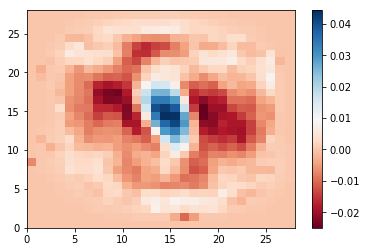

In [161]:
model = svm.LinearSVC(C=2**(-12),loss='hinge')
model.fit(features_train, labels_train)
predicted_train = model.predict(features_train)
predicted_test = model.predict(features_test)
error_train = sklearn.metrics.mean_squared_error(labels_train, predicted_train)
error_test = sklearn.metrics.mean_squared_error(labels_test, predicted_test)
print("Train Error: "+ str(error_train))
print("Test Error: "+ str(error_test))

weights = model.coef_
matrix_weights = weights.reshape((28,28))
plt.pcolor(matrix_weights, cmap='RdBu')
plt.colorbar()

### Test for 6 and 8 (C = $2^{-5}$)

In [175]:
r_min1_train, r_max1_train = ranges[6][0], ranges[6][1]
r_min2_train, r_max2_train = ranges[8][0], ranges[8][1]
r_min1_test, r_max1_test = ranges[16][0], ranges[16][1]
r_min2_test, r_max2_test = ranges[18][0], ranges[18][1]

features_class1_train = mnist_normalized[r_min1_train:r_max1_train,:]
features_class2_train = mnist_normalized[r_min2_train:r_max2_train,:]
labels_class1_train = mnist_label[r_min1_train:r_max1_train]
labels_class2_train = mnist_label[r_min2_train:r_max2_train]
features_class1_test = mnist_normalized[r_min1_test:r_max1_test,:]
features_class2_test = mnist_normalized[r_min2_test:r_max2_test,:]
labels_class1_test = mnist_label[r_min1_test:r_max1_test]
labels_class2_test = mnist_label[r_min2_test:r_max2_test]

features_train = np.vstack((features_class1_train, features_class2_train))
features_test = np.vstack((features_class1_test, features_class2_test))
labels_train = np.append(labels_class1_train, labels_class2_train)
labels_test = np.append(labels_class1_test, labels_class2_test)

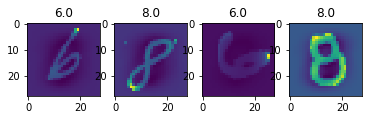

In [176]:
plt.subplot(1, 4, 1)
plt.imshow(features_train[100].reshape(28,28))
plt.title(str(labels_train[100]))
plt.subplot(1, 4, 2)
plt.imshow(features_train[8000].reshape(28,28))
plt.title(str(labels_train[8000]))
plt.subplot(1, 4, 3)
plt.imshow(features_test[100].reshape(28,28))
plt.title(str(labels_test[100]))
plt.subplot(1, 4, 4)
plt.imshow(features_test[1500].reshape(28,28))
plt.title(str(labels_test[1500]))

Train Error: 0.012235534030079022
Test Error: 0.049689440993788817


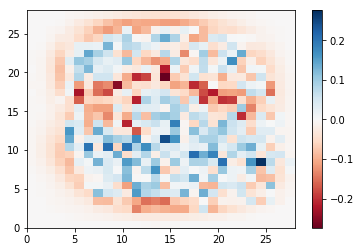

In [177]:
model = svm.LinearSVC(C=2**(-5),loss='hinge')
model.fit(features_train, labels_train)
predicted_train = model.predict(features_train)
predicted_test = model.predict(features_test)
error_train = sklearn.metrics.mean_squared_error(labels_train, predicted_train)
error_test = sklearn.metrics.mean_squared_error(labels_test, predicted_test)
print("Train Error: "+ str(error_train))
print("Test Error: "+ str(error_test))

weights = model.coef_
matrix_weights = weights.reshape((28,28))
plt.pcolor(matrix_weights, cmap='RdBu')
plt.colorbar()

### Test for 4 and 7 (C = $2^5$ = 32)

In [172]:
r_min1_train, r_max1_train = ranges[4][0], ranges[4][1]
r_min2_train, r_max2_train = ranges[7][0], ranges[7][1]
r_min1_test, r_max1_test = ranges[14][0], ranges[14][1]
r_min2_test, r_max2_test = ranges[17][0], ranges[17][1]

features_class1_train = mnist_normalized[r_min1_train:r_max1_train,:]
features_class2_train = mnist_normalized[r_min2_train:r_max2_train,:]
labels_class1_train = mnist_label[r_min1_train:r_max1_train]
labels_class2_train = mnist_label[r_min2_train:r_max2_train]
features_class1_test = mnist_normalized[r_min1_test:r_max1_test,:]
features_class2_test = mnist_normalized[r_min2_test:r_max2_test,:]
labels_class1_test = mnist_label[r_min1_test:r_max1_test]
labels_class2_test = mnist_label[r_min2_test:r_max2_test]

features_train = np.vstack((features_class1_train, features_class2_train))
features_test = np.vstack((features_class1_test, features_class2_test))
labels_train = np.append(labels_class1_train, labels_class2_train)
labels_test = np.append(labels_class1_test, labels_class2_test)

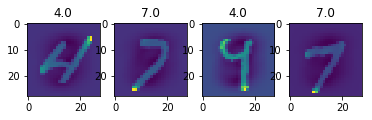

In [173]:
plt.subplot(1, 4, 1)
plt.imshow(features_train[100].reshape(28,28))
plt.title(str(labels_train[100]))
plt.subplot(1, 4, 2)
plt.imshow(features_train[8000].reshape(28,28))
plt.title(str(labels_train[8000]))
plt.subplot(1, 4, 3)
plt.imshow(features_test[100].reshape(28,28))
plt.title(str(labels_test[100]))
plt.subplot(1, 4, 4)
plt.imshow(features_test[1500].reshape(28,28))
plt.title(str(labels_test[1500]))

Train Error: 0.005203601222433303
Test Error: 0.1746268656716418


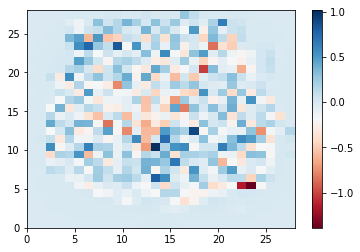

In [174]:
model = svm.LinearSVC(C=2**5,loss='hinge')
model.fit(features_train, labels_train)
predicted_train = model.predict(features_train)
predicted_test = model.predict(features_test)
error_train = sklearn.metrics.mean_squared_error(labels_train, predicted_train)
error_test = sklearn.metrics.mean_squared_error(labels_test, predicted_test)
print("Train Error: "+ str(error_train))
print("Test Error: "+ str(error_test))

weights = model.coef_
matrix_weights = weights.reshape((28,28))
plt.pcolor(matrix_weights, cmap='RdBu')
plt.colorbar()

As we can see in the above examples, for small $C$ values give weights which can be related to the digits that we are trying to predict. But for a bigger value for $C$ $(2^5)$, the plot obtained for weights is very sparse with respect to the other examples. Furthermore, we can see that for bigger values of $C$, we reduce our training error, but increase the test error, but for smaller values of $C$ we may increase the train error, but decrease the test error.


## 3.
## a) 
The data set we build is made up of the most frequent words of length greater than 3 characters in spanish and english form wiktionary.org. The data was downloaded and filtered with bash tools as awk, sed and vim commands, always ordered from most frequent to less frequent word. 
For this assigment, many data sets were build for tuning up the parameters and real training.
For the cross validation, a date set was build with words within the 7000 and 8000 most frequent words (none of this range was used in the training set). 

### B)

## String Subsequence Kernel
This implementation uses dynamic programming to caculate the number of common string subsequences of length n of two strings, the distance between characters in the subsequence is penalized with a decay factor $\lambda$, the implementatin consist of n+1 iterations, where each iteration creates a matrix and each position j,k tells how many common subsequences of length i have been counted at the moment and wich decay the subsequece has.

In [2]:
def ssk (a, b, n, lam):
    Kp = np.zeros((n + 1, len(a), len(b)), dtype=np.float64)
    Kp[0, :] = 1.0
    for i in range(n):
        for j in range(len(a) - 1):
            Kpp = 0.0
            for k in range(len(b) - 1):
                Kpp = lam * (Kpp + lam * int(a[j] == b[k]) * Kp[i, j, k])           
                Kp[i+1, j+1, k+1] = lam * Kp[i+1, j, k+1] + Kpp
                
    K = 0.0
    for j in range(len(a)):
        for k in range(len(b)):
            K += lam * lam * int(a[j] == b[k]) * Kp[n-1, j, k]
    
    return  K

## N-Grams kernel 
Implementation of the n-gram kernel taken from scikit-learn

In [3]:
def ngk(doc1, doc2, n=2):
    # Counts the occurences of unique n-grams
    ngrams = CountVectorizer(analyzer='char', ngram_range=(n, n)).fit_transform([doc1, doc2])

    # Normalize
    a, b = TfidfTransformer().fit_transform(ngrams).toarray()    
    return np.dot(a, b)

### C)

## SSK Classifier with scikit-learn svm.SVC

In [5]:
def sskClassifier(n, lam):
    #t = time()
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            gram[i][j] = ssk(X[i], X[j], n, lam)

    clf = svm.SVC(kernel='precomputed')
    clf.fit(gram, Y)

    for i in range(XT.shape[0]):
        for j in range(X.shape[0]):
            gramT[i][j] = ssk(XT[i], X[j], n, lam)

    Z = clf.predict(gramT)
    a = accuracy_score(YT, Z)
    print(a)
    return a

## Cross validation
To compare different parameters of n and $\lambda$, we used a smaller part of the dataset because we just want the apparently best parameters, not a high accuracy at the moment

## Load data

In [3]:
english = np.genfromtxt('words/english400.txt',dtype='str')
spanish = np.genfromtxt('words/spanish400.txt',dtype='str')
sl = np.zeros(spanish.shape)
el = np.full(spanish.shape, 1)
X = np.concatenate((spanish, english), axis=0)
Y = np.concatenate((sl, el), axis=0)

englishTest = np.genfromtxt('words/englishTest100.txt',dtype='str')
spanishTest = np.genfromtxt('words/spanishTest100.txt',dtype='str')
slt = np.zeros(spanishTest.shape)
elt = np.full(spanishTest.shape, 1)
XT = np.concatenate((spanishTest, englishTest), axis=0)
YT = np.concatenate((slt, elt), axis=0)

gram = np.zeros((X.shape[0], X.shape[0]))
gramT = np.zeros((XT.shape[0], X.shape[0]))

## Compare accuracy

In [7]:
nMax, lamMax, tmp = 0, 0, 0
for n in range(2, 8):
    for lam in range(1, 11):
        print("n ", n, "lamda ", lam/10.0)
        aux = sskClassifier(n, lam/10.0)
        if aux > tmp:
            tmp = aux
            nMax = n
            lamMax = lam

print("nMax", nMax, "lamMax", lamMax, "value", tmp)

n  2 lamda  0.1
0.715
n  2 lamda  0.2
0.72
n  2 lamda  0.3
0.705
n  2 lamda  0.4
0.695
n  2 lamda  0.5
0.745
n  2 lamda  0.6
0.77
n  2 lamda  0.7
0.775
n  2 lamda  0.8
0.73
n  2 lamda  0.9
0.74
n  2 lamda  1.0
0.725
n  3 lamda  0.1
0.59
n  3 lamda  0.2
0.585
n  3 lamda  0.3
0.61
n  3 lamda  0.4
0.665
n  3 lamda  0.5
0.705
n  3 lamda  0.6
0.75
n  3 lamda  0.7
0.745
n  3 lamda  0.8
0.76
n  3 lamda  0.9
0.72
n  3 lamda  1.0
0.71
n  4 lamda  0.1
0.61
n  4 lamda  0.2
0.65
n  4 lamda  0.3
0.67
n  4 lamda  0.4
0.62
n  4 lamda  0.5
0.565
n  4 lamda  0.6
0.555
n  4 lamda  0.7
0.735
n  4 lamda  0.8
0.69
n  4 lamda  0.9
0.685
n  4 lamda  1.0
0.65
n  5 lamda  0.1
0.525
n  5 lamda  0.2
0.515
n  5 lamda  0.3
0.505
n  5 lamda  0.4
0.5
n  5 lamda  0.5
0.5
n  5 lamda  0.6
0.5
n  5 lamda  0.7
0.615
n  5 lamda  0.8
0.66
n  5 lamda  0.9
0.625
n  5 lamda  1.0
0.62
n  6 lamda  0.1
0.5
n  6 lamda  0.2
0.5
n  6 lamda  0.3
0.5
n  6 lamda  0.4
0.5
n  6 lamda  0.5
0.5
n  6 lamda  0.6
0.5
n  6 lamda  0.7
0.5
n  6

In [4]:
trace = go.Table(
    header=dict(values=['Subsequence length', 'Decay factor', 'Accuracy score'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
                       [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                       [0.715, 0.72, 0.705, 0.695, 0.745, 0.77, 0.775, 0.73, 0.74, 0.725, 0.59, 0.585, 0.61, 0.665, 0.705, 0.75, 0.745, 0.76, 0.72, 0.71, 0.61, 0.65, 0.67, 0.62, 0.565, 0.555, 0.735, 0.69, 0.685, 0.65, 0.525, 0.515, 0.505, 0.5, 0.5, 0.5, 0.615, 0.66, 0.625, 0.62, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.54, 0.535, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.495, 0.495]
                      ],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 4))

layout = dict(width=600, height=800)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'styled_table')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jccaleroe/0 or inside your plot.ly account where it is named 'styled_table'


### Best parameters:
### n= 2, lambda = 0.7

## NGK Classifier with scikit-learn svm.SVC

In [5]:
def ngkClassifier(n):    
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            gram2[i][j] = ngk(X[i], X[j], n)

    clf2 = svm.SVC(kernel='precomputed')
    clf2.fit(gram2, Y)    
    
    for i in range(XT.shape[0]):
        for j in range(X.shape[0]):
            gramT2[i][j] = ngk(XT[i], X[j], n)

    Z2 = clf2.predict(gramT2)

    a = accuracy_score(YT, Z2)
    print(a)
    return a

## Cross validation
To compare different parameters of n and $\lambda$, we used a smaller part of the dataset because we just want the apparently best parameters, not a high accuracy at the moment

## Load data

In [ ]:
english = np.genfromtxt('words/english400.txt',dtype='str')
spanish = np.genfromtxt('words/spanish400.txt',dtype='str')
sl = np.zeros(spanish.shape)
el = np.full(spanish.shape, 1)
X = np.concatenate((spanish, english), axis=0)
Y = np.concatenate((sl, el), axis=0)

englishTest = np.genfromtxt('words/englishTest100.txt',dtype='str')
spanishTest = np.genfromtxt('words/spanishTest100.txt',dtype='str')
slt = np.zeros(spanishTest.shape)
elt = np.full(spanishTest.shape, 1)
XT = np.concatenate((spanishTest, englishTest), axis=0)
YT = np.concatenate((slt, elt), axis=0)

gram2 = np.zeros((X.shape[0], X.shape[0]))
gramT2 = np.zeros((XT.shape[0], X.shape[0]))

In [5]:
nMax, tmp = 0, 0
for n in range(1, 5):
    print("n ", n)
    aux = ngkClassifier(n)
    if aux > tmp:
        tmp = aux
        nMax = n
        
print("Max n:", nMax, "value:", tmp)


n  1
0.705
n  2
0.79
n  3
0.71
n  4
0.69
Max n: 2 value: 0.79


In [53]:
trace = go.Table(
    header=dict(values=['N-grams', 'Accuracy score'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[[1, 2, 3, 4],
                       [0.705, 0.79, 0.71, 0.69]],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 4))

layout = dict(width=500, height=300)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'styled_table')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jccaleroe/0 or inside your plot.ly account where it is named 'styled_table'


### Best parameter: 
### n = 2

## D)
## Performance and errors

## SSK
Now, with a better idea of what parameters to use, we trained a medium data set with 4000 spanish words and 4000 english words adding up to 8000 words

In [25]:
english = np.genfromtxt('words/english4000.txt',dtype='str')
spanish = np.genfromtxt('words/spanish4000.txt',dtype='str')
sl = np.zeros(spanish.shape)
el = np.full(spanish.shape, 1)
X = np.concatenate((spanish, english), axis=0)
Y = np.concatenate((sl, el), axis=0)

englishTest = np.genfromtxt('words/englishTest100.txt',dtype='str')
spanishTest = np.genfromtxt('words/spanishTest100.txt',dtype='str')
slt = np.zeros(spanishTest.shape)
elt = np.full(spanishTest.shape, 1)
XT = np.concatenate((spanishTest, englishTest), axis=0)
YT = np.concatenate((slt, elt), axis=0)

gram = np.zeros((X.shape[0], X.shape[0]))
gramT = np.zeros((XT.shape[0], X.shape[0]))

## Accuracy

In [7]:
a = sskClassifier(2, 0.7)

0.87


In [17]:
clf = svm.SVC(kernel='precomputed')
clf.fit(gram, Y)
Z = clf.predict(gramT)

## Words mistaken
Here we can see, it classified zero as a word in English and chocolate as a word in Spanish, but that they were in the data set of Spanish and English respectively, these errors are acceptable since both languages use those words. We can also see a name Hugo, which can be of both languages too, the other words with a data set a little bit larger could have been avoidable, but in general most words have at least 6 characters, and bigger words are harder to classify since they have more common subsequences with others words.

In [34]:
for i in range(Z.shape[0]):
    if Z[i] != YT[i]:
        print(XT[i], "Predicted:", "Spanish," if Z[i] == 0 else "English,", "Real:", "Spanish" if YT[i] == 0 else "English")

cicatrices Predicted: English, Real: Spanish
zero Predicted: English, Real: Spanish
utilizan Predicted: English, Real: Spanish
coincide Predicted: English, Real: Spanish
atraen Predicted: English, Real: Spanish
aplicar Predicted: English, Real: Spanish
agáchate Predicted: English, Real: Spanish
triunfo Predicted: English, Real: Spanish
timbre Predicted: English, Real: Spanish
sufren Predicted: English, Real: Spanish
sesos Predicted: English, Real: Spanish
servirle Predicted: English, Real: Spanish
soda Predicted: Spanish, Real: English
candid Predicted: Spanish, Real: English
Hugo Predicted: Spanish, Real: English
chairman Predicted: Spanish, Real: English
climax Predicted: Spanish, Real: English
cupboard Predicted: Spanish, Real: English
ludicrous Predicted: Spanish, Real: English
colossal Predicted: Spanish, Real: English
colorado Predicted: Spanish, Real: English
plateau Predicted: Spanish, Real: English
indescribable Predicted: Spanish, Real: English
rubber Predicted: Spanish, Real

## NGK
Now, with a better idea of what parameters to use, we trained a medium data set with 3000 spanish words and 3000 english words adding up to 6000 words

In [7]:
english = np.genfromtxt('words/english2000.txt',dtype='str')
spanish = np.genfromtxt('words/spanish2000.txt',dtype='str')
sl = np.zeros(spanish.shape)
el = np.full(spanish.shape, 1)
X = np.concatenate((spanish, english), axis=0)
Y = np.concatenate((sl, el), axis=0)

englishTest = np.genfromtxt('words/englishTest100.txt',dtype='str')
spanishTest = np.genfromtxt('words/spanishTest100.txt',dtype='str')
slt = np.zeros(spanishTest.shape)
elt = np.full(spanishTest.shape, 1)
XT = np.concatenate((spanishTest, englishTest), axis=0)
YT = np.concatenate((slt, elt), axis=0)

gram2 = np.zeros((X.shape[0], X.shape[0]))
gramT2 = np.zeros((XT.shape[0], X.shape[0]))

## Accuracy

In [8]:
a = ngkClassifier(2)

0.875


In [9]:
clf2 = svm.SVC(kernel='precomputed')
clf2.fit(gram2, Y)
Z2 = clf2.predict(gramT2)

## Words mistaken
Here we can see, it classified chocolate as a word in Spanish, but it is an English data set word, but that is a spanish word, so it is not so bad. We can also see names as Hugo, colorado and Pero, which can be of both languages too, the other words with a data set a little bit larger could have been avoidable, but in general this classifier tends more to classify spanish words than english.

In [10]:
for i in range(Z2.shape[0]):
    if Z2[i] != YT[i]:
        print(XT[i], "Predicted:", "Spanish," if Z2[i] == 0 else "English,", "Real:", "Spanish" if YT[i] == 0 else "English")

utilizan Predicted: English, Real: Spanish
reemplazar Predicted: English, Real: Spanish
insignia Predicted: English, Real: Spanish
explícame Predicted: English, Real: Spanish
aplicar Predicted: English, Real: Spanish
agáchate Predicted: English, Real: Spanish
triunfo Predicted: English, Real: Spanish
sufren Predicted: English, Real: Spanish
retirarse Predicted: English, Real: Spanish
soda Predicted: Spanish, Real: English
salon Predicted: Spanish, Real: English
Peru Predicted: Spanish, Real: English
Hugo Predicted: Spanish, Real: English
deficient Predicted: Spanish, Real: English
hazel Predicted: Spanish, Real: English
knave Predicted: Spanish, Real: English
climax Predicted: Spanish, Real: English
colossal Predicted: Spanish, Real: English
vale Predicted: Spanish, Real: English
colorado Predicted: Spanish, Real: English
barley Predicted: Spanish, Real: English
indescribable Predicted: Spanish, Real: English
adieu Predicted: Spanish, Real: English
abuses Predicted: Spanish, Real: Engl